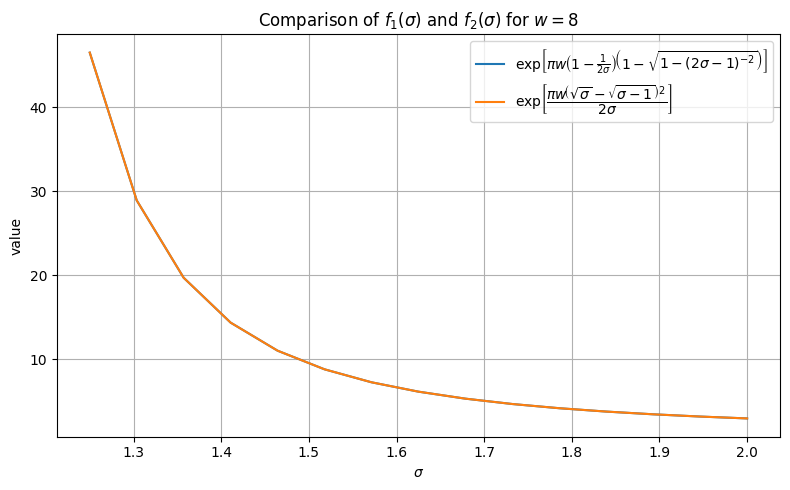

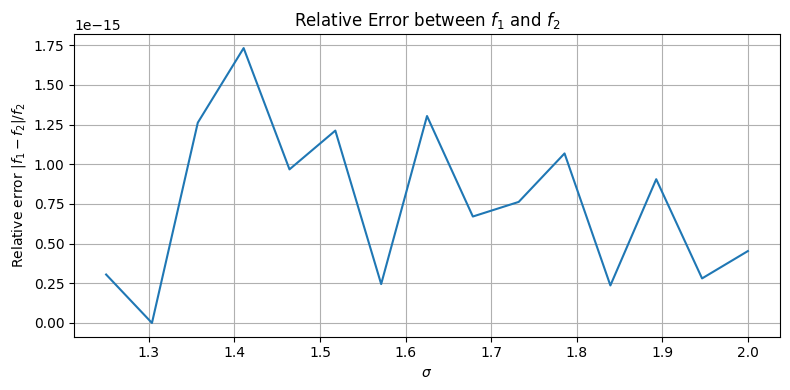

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f1(sigma, w=1.0):
    nu = 1
    beta = nu * np.pi * w * (1 - 1/(2*sigma))
    content = 1 - np.sqrt(1 - np.power(2*sigma - 1, -2))
    return np.exp(content * beta)

def f2(sigma, w=1.0):
    diff_sq = (np.sqrt(sigma) - np.sqrt(sigma - 1.0))**2
    return np.exp((np.pi*w * diff_sq) / (2.0*sigma))

# Parameters
w = 8.0
sigma = np.linspace(1.25, 2, 15)

y1 = f1(sigma, w)
y2 = f2(sigma, w)

for s, val in zip(sigma, y1):
    print(f"sigma = {s:.6f}, w = {w:.2f}, f1 = {val:.16e}")

plt.figure(figsize=(8, 5))
plt.plot(
    sigma, y1,
    label=r"$\exp\!\left[\pi w\!\left(1-\frac{1}{2\sigma}\right)\!\left(1-\sqrt{1-(2\sigma-1)^{-2}}\right)\right]$"
)
plt.plot(
    sigma, y2,
    label=r"$\exp\!\left[\dfrac{\pi w\!\left(\sqrt{\sigma}-\sqrt{\sigma-1}\right)^{2}}{2\sigma}\right]$"
)
plt.xlabel(r"$\sigma$")
plt.ylabel("value")
plt.title(r"Comparison of $f_1(\sigma)$ and $f_2(\sigma)$ for $w=8$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

error = y1 - y2
rel_error = np.abs(error / y2)
plt.figure(figsize=(8, 4))
plt.plot(sigma, rel_error)
plt.xlabel(r"$\sigma$")
plt.ylabel(r"Relative error $|f_1 - f_2| / f_2$")
plt.title(r"Relative Error between $f_1$ and $f_2$")
plt.grid(True)
plt.tight_layout()
plt.show()


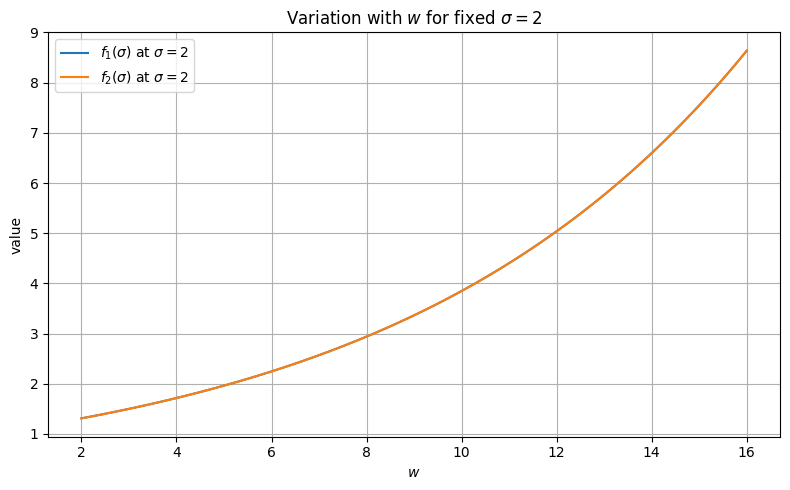

In [35]:
# Fixed σ and varying w
sigma = 2.0  # fixed value
w_values = np.linspace(2, 16, 100)

y1 = f1(sigma, w_values)
y2 = f2(sigma, w_values)

plt.figure(figsize=(8, 5))
plt.plot(w_values, y1, label=r"$f_1(\sigma)$ at $\sigma=2$")
plt.plot(w_values, y2, label=r"$f_2(\sigma)$ at $\sigma=2$")
plt.xlabel(r"$w$")
plt.ylabel("value")
plt.title(r"Variation with $w$ for fixed $\sigma=2$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


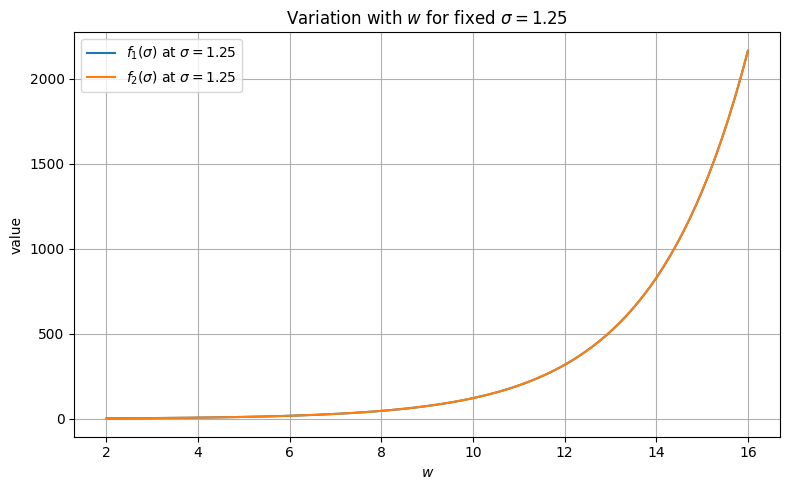

In [36]:
# Fixed σ and varying w
sigma = 1.25  # fixed value
w_values = np.linspace(2, 16, 100)

y1 = f1(sigma, w_values)
y2 = f2(sigma, w_values)

plt.figure(figsize=(8, 5))
plt.plot(w_values, y1, label=r"$f_1(\sigma)$ at $\sigma=1.25$")
plt.plot(w_values, y2, label=r"$f_2(\sigma)$ at $\sigma=1.25$")
plt.xlabel(r"$w$")
plt.ylabel("value")
plt.title(r"Variation with $w$ for fixed $\sigma=1.25$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

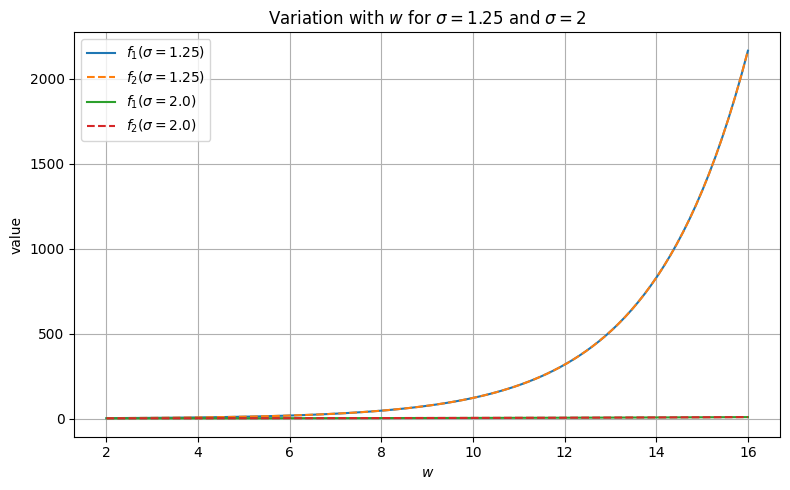

In [37]:
# Parameters
w_values = np.linspace(2, 16, 100)
sigmas = [1.25, 2.0]

plt.figure(figsize=(8, 5))

for sigma in sigmas:
    y1 = f1(sigma, w_values)
    y2 = f2(sigma, w_values)
    plt.plot(w_values, y1, label=fr"$f_1(\sigma={sigma})$")
    plt.plot(w_values, y2, "--", label=fr"$f_2(\sigma={sigma})$")

plt.xlabel(r"$w$")
plt.ylabel("value")
plt.title(r"Variation with $w$ for $\sigma=1.25$ and $\sigma=2$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


sigma_min for w=2, eps=0.001 is 5.791846
sigma_min for w=4, eps=0.001 is -0.433018
sigma_min for w=6, eps=0.001 is -0.155133
sigma_min for w=8, eps=0.001 is -0.081716
sigma_min for w=10, eps=0.001 is -0.050804
sigma_min for w=12, eps=0.001 is -0.034741
sigma_min for w=14, eps=0.001 is -0.025291
sigma_min for w=16, eps=0.001 is -0.019249
sigma_min for w=2, eps=1e-06 is 1.260773
sigma_min for w=4, eps=1e-06 is 5.791846
sigma_min for w=6, eps=1e-06 is -1.160735
sigma_min for w=8, eps=1e-06 is -0.433018
sigma_min for w=10, eps=1e-06 is -0.239757
sigma_min for w=12, eps=1e-06 is -0.155133
sigma_min for w=14, eps=1e-06 is -0.109470
sigma_min for w=16, eps=1e-06 is -0.081716
sigma_min for w=2, eps=1e-09 is 1.101233
sigma_min for w=4, eps=1e-09 is 1.581548
sigma_min for w=6, eps=1e-09 is 5.791846
sigma_min for w=8, eps=1e-09 is -2.123896
sigma_min for w=10, eps=1e-09 is -0.770311
sigma_min for w=12, eps=1e-09 is -0.433018
sigma_min for w=14, eps=1e-09 is -0.285353
sigma_min for w=16, eps=1e-09

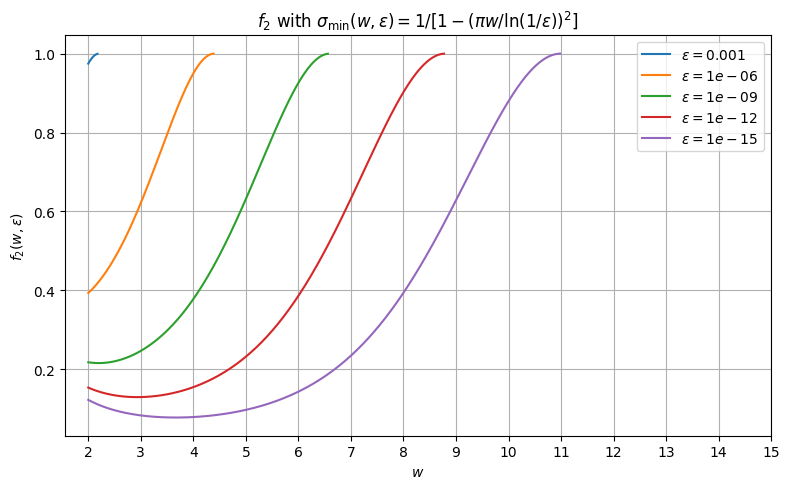

In [38]:
def sigma_min(w, eps):
    num = (np.pi * w / np.log(1 / eps))**2
    return 1.0 / (1.0 - num)

def f2_sigma_eps(w, eps):
    sigma = sigma_min(w, eps)
    for w_tmp, sigma_tmp in zip(w, sigma):
        if np.isclose(w_tmp, np.round(w_tmp)):
            print(f"sigma_min for w={w_tmp:.0f}, eps={eps} is {sigma_tmp:.6f}")
    # avoid invalid region where sigma <= 1
    sigma[sigma <= 1] = np.nan
    diff_sq = (np.sqrt(sigma) - np.sqrt(sigma - 1.0))**2
    return np.exp(-(np.pi * w * diff_sq) / (2.0 * sigma))

# Parameters
eps_values = [1e-3, 1e-6, 1e-9, 1e-12, 1e-15]
w_values = np.linspace(2, 16, 400)

plt.figure(figsize=(8, 5))
for eps in eps_values:
    y = f2_sigma_eps(w_values, eps)
    plt.plot(w_values, y, label=fr"$\varepsilon={eps}$")

plt.xlabel(r"$w$")
plt.xticks(range(2, 16, 1))
plt.ylabel(r"$f_2(w,\varepsilon)$")
plt.title(r"$f_2$ with $\sigma_{\min}(w,\varepsilon)=1/[1-(\pi w/\ln(1/\varepsilon))^2]$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
